## Pre-Trained DistilBERT

In [273]:
import os

import pandas as pd
import torch
from transformers import BertTokenizer, DistilBertModel, DistilBertTokenizer, DistilBertConfig

In [274]:
# load base models (~65M params)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
model = DistilBertModel.from_pretrained('distilbert-base-cased')

I0718 07:25:17.673409 4359718336 tokenization_utils.py:1022] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-vocab.txt from cache at /Users/shaharazulay/.cache/torch/transformers/5e8a2b4893d13790ed4150ca1906be5f7a03d6c4ddf62296c383f6db42814db2.e13dbb970cb325137104fb2e5f36fe865f27746c6b526f6352861b1980eb80b1
I0718 07:25:26.908700 4359718336 configuration_utils.py:265] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-cased-config.json from cache at /Users/shaharazulay/.cache/torch/transformers/774d52b0be7c2f621ac9e64708a8b80f22059f6d0e264e1bdc4f4d71c386c4ea.f44aaaab97e2ee0f8d9071a5cd694e19bf664237a92aea20ebe04ddb7097b494
I0718 07:25:26.910992 4359718336 configuration_utils.py:301] Model config DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  

In [275]:
tokenizer.special_tokens_map.values()

dict_values(['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'])

### Tokenize

In [278]:
input_sentence = "I can't help it, I love DNA!"

In [279]:
tokens = tokenizer.encode(input_sentence, add_special_tokens=True, max_length=20, pad_to_max_length=True)
tokens

[101,
 146,
 1169,
 112,
 189,
 1494,
 1122,
 117,
 146,
 1567,
 5394,
 106,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [286]:
tokenizer.get_special_tokens_mask(tokens, already_has_special_tokens=True)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [228]:
tokenizer.ids_to_tokens[102]

'[SEP]'

In [172]:
input_ids = torch.tensor(tokens).unsqueeze(0)  # Batch size 1
input_ids

tensor([[ 101,  146, 1169,  112,  189, 1494, 1122,  117,  146, 1567, 5394,  106,
          102]])

In [173]:
outputs = model(input_ids)
outputs[0].shape

torch.Size([1, 13, 768])

In [174]:
sentence_embedding = outputs[0][0][0, :]  # For sentence embeddings we take the first ([CLS]) token embedding
sentence_embedding.shape

torch.Size([768])

## Training a BPE Tokenizer

In [86]:
from tokenizers import Tokenizer, BertWordPieceTokenizer
from tokenizers.models import BPE
from tokenizers.normalizers import Lowercase, NFKC, Sequence
from tokenizers.pre_tokenizers import WhitespaceSplit
from tokenizers.processors import BertProcessing
from tokenizers.trainers import BpeTrainer

### Load some input corpus

In [258]:
BIG_FILE_URL = 'https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt'

# Let's download the file and save it somewhere
from requests import get
with open('big.txt', 'wb') as big_f:
    response = get(BIG_FILE_URL, )
    
    if response.status_code == 200:
        big_f.write(response.content)
    else:
        print("Unable to get the file: {}".format(response.reason))


### Create a Tokenizer class

In [259]:
tokenizer = BertWordPieceTokenizer(
    lowercase=False, 
    handle_chinese_chars=False,
    unk_token="[UNK]",
    sep_token="[SEP]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    mask_token="[MASK]",
    clean_text=True)

In [260]:
# Customize training
tokenizer.train(
    files=['big.txt'], 
    vocab_size=2000,
    min_frequency=2
)

In [261]:
tokenizer.token_to_id('[SEP]')

3

In [262]:
# Save the tokenizer 
tokenizer.save('.')

['./vocab.txt']

In [263]:
tokenizer = BertWordPieceTokenizer('vocab.txt')
tokenizer.enable_truncation(512)
tokenizer.enable_padding(max_length=512)

In [264]:
output = tokenizer.encode("I love NY!", add_special_tokens=True)
output.tokens, output.ids

(['[CLS]',
  'i',
  'love',
  'n',
  '##y',
  '!',
  '[SEP]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '

In [89]:
# First we create an empty Byte-Pair Encoding model (i.e. not trained model)
tokenizer = Tokenizer(BPE())

# Then we enable lower-casing and unicode-normalization
tokenizer.normalizer = Sequence([
    NFKC(),
    Lowercase()
])

# We use a while-space pre-tokenization
tokenizer.pre_tokenizer = WhitespaceSplit()

In [90]:
# We initialize our trainer, giving him the details about the vocabulary we want to generate
trainer = BpeTrainer(
    special_tokens=['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'],
    vocab_size=2000, 
    show_progress=True)

In [91]:
# Train the tokenizer on the corpus
tokenizer.train(trainer, ["big.txt"])

print("Trained vocab size: {}".format(tokenizer.get_vocab_size()))

Trained vocab size: 2000


In [159]:
input_sentence = "I can't help it, I love DNA!"

In [160]:
tokens = tokenizer.encode(input_sentence, add_special_tokens=True)
tokens.tokens

['I', 'can', "'", 't', 'help', 'it', ',', 'I', 'love', 'D', '##N', '##A', '!']

##### Adding BERT post-processor

In [98]:
tokenizer.post_processor = BertProcessing(
    ("[SEP]", tokenizer.token_to_id("[SEP]")),
    ("[CLS]", tokenizer.token_to_id("[CLS]"))
)

In [99]:
tokens = tokenizer.encode(input_sentence, add_special_tokens=True)
tokens.tokens

['[CLS]', 'i', "can't", 'help', 'it,', 'i', 'love', 'd', 'na', '!', '[SEP]']

In [100]:
tokens.ids

[3, 49, 1823, 1560, 744, 49, 878, 44, 352, 5, 1]

In [55]:
# Save the tokenizer 
tokenizer.model.save('.')

['./vocab.json', './merges.txt']

In [62]:
tokenizer.get_vocab()['[SEP]']

1

### Look at what the tokenizer did

In [184]:
cat merges.txt

#version: 0.2 - Trained by `huggingface/tokenizers`
t h
th e
i n
a n
e r
o n
r e
a t
e n
e d
i s
an d
o f
o u
t o
a s
e s
o r
in g
a r
a l
i t
l e
h e
i c
i on
o m
s t
s e
a d
w h
l y
b e
en t
a c
o w
i m
i d
w i
r o
c h
v e
th at
u t
l l
n o
f or
w as
s u
wi th
l d
h is
v er
c e
t er
a m
a y
g h
i r
c on
u n
r i
l o
s ,
h a
at ion
l i
u r
d e
al l
y ou
m o
c t
no t
a b
h ad
f r
p e
re s
a g
h er
n e
p o
s o
u s
f e
b y
on e
c om
ou n
u l
e x
a in
h im
es s
the r
e m
gh t
a re
a p
i l
b ut
er e
ic h
- -
s h
p r
ou t
w e
fr om
p er
' s
o l
ou ld
e t
i f
e ,
es t
s a
wh ich
s .
p ro
o d
t r
u p
q u
an t
m an
p l
s he
d er
w ere
. .
ou s
a k
ou r
g o
d is
th is
wh o
s i
ar t
m e
the y
f o
es ,
m ent
d o
i ll
en d
. "
n ow
ar d
oun d
c o
u st
at e
m y
ha ve
ed ,
sa id
g r
u m
in d
o k
se l
the re
ac t
a f
o p
ar y
pr in
e v
p res
ver y
s om
wh at
it y
i er
g e
wh en
the ir
i ve
on g
u re
ow n
th ing
am e
a w
is h
c i
t e
o ther
b r
c l
k e
al ly
is t
a u
s to
, "
m ay
som e
ed .
be en
the 

### Load the saved tokenizer

In [93]:
tokenizer.model = BPE('vocab.json', 'merges.txt')

### Tokenize

In [42]:
input_sentence = "I can't help it, I love DNA!"

In [43]:
encoding = tokenizer.encode(input_sentence)

print("Encoded string: {}".format(encoding.tokens))

Encoded string: ['i', "can't", 'help', 'it,', 'i', 'love', 'd', 'na', '!']


In [44]:
encoding.ids

[44, 1818, 1555, 739, 44, 873, 39, 347, 0]

## DNA specific Tokenization 

In [250]:
dna_corpus = '/Users/shaharazulay/Downloads/SILVA_parsed_V2.tsv'

In [251]:
dna_corpus_df = pd.read_csv(dna_corpus, sep='\t')
dna_corpus_df.shape

/Users/shaharazulay/anaconda3/envs/dev/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(432033, 13)

In [10]:
def sequence_into_file(seq, file_):
    with open(file_, 'a') as f_out:
        f_out.write(seq)
        f_out.write(' ') # seperator
    return len(seq)      

In [11]:
import tempfile
import shutil

file_ = tempfile.NamedTemporaryFile(delete=False).name
file_

'/var/folders/wg/nhqr3m4j5tqct6hlw4d7kpq00000gn/T/tmp5whhcxzt'

In [12]:
_ = dna_corpus_df.seq.apply(lambda seq: sequence_into_file(seq, file_=file_)).values

In [13]:
ls -la {file_}

-rw-------  1 shaharazulay  staff  621095900 Jul 15 08:44 /var/folders/wg/nhqr3m4j5tqct6hlw4d7kpq00000gn/T/tmp5whhcxzt


In [14]:
from _pre_tokenizer import DNAPreTokenizer  # still doesn't work

In [45]:
tokenizer = Tokenizer(BPE())

tokenizer.normalizer = Sequence([
    Lowercase()
])

# now with custom pre-tokenizer
tokenizer.pre_tokenizer = WhitespaceSplit()

In [46]:
trainer = BpeTrainer(
    vocab_size=1611004, 
    show_progress=True)

In [47]:
tokenizer.train(trainer, [file_])
tokenizer.get_vocab_size()

1611004

In [48]:
tokenizer.model.save('.')

['./vocab.json', './merges.txt']

In [25]:
tokenizer.get_vocab()

{'uuucccuucggggacaaagugacagguggugcaugguugucgucagcucgugucgugagauguuggguuaagucccgcaacgagcgcaacccuu': 11016,
 'gcguucccccuucgg': 11275,
 'gacgguaccggaagaagaa': 13609,
 'acacagucagc': 14053,
 'ggugaauacguucccgggccuugcacacac': 13416,
 'ggaacuugagugcagaagagaa': 12012,
 'cgagagg': 1437,
 'uaagcgagau': 7335,
 'caauggcgaaggcagc': 5115,
 'uaucgac': 2416,
 'cgcuggcgguaugcuuaacacaugcaagucgaacgg': 6743,
 'uaagcggaauucc': 3052,
 'agcuaacgugauaaaucgac': 6675,
 'gaagcuggaaucgcuaguaaucgcagaucagaaugcugc': 9711,
 'gucaucauggcccuuauguccagggcuacacacgugcuacaaugg': 7101,
 'gaaucagaacacaggugcugcauggcugucgucagcucgugucgugagauguuggguuaagucccgcaacgagcgcaaccccugu': 11148,
 'aaucguggaucagcaugccac': 7833,
 'uuugu': 478,
 'gaaggaagaaggcuuucggguuguaaac': 6634,
 'gaaagcaugggg': 1950,
 'uuaaagc': 12963,
 'cgaugauacgc': 742,
 'acgccggcaacgg': 1671,
 'agcaaacaggauuagauacccugguaguccac': 262,
 'ggugaauacguucccgggccuuguacacaccgcccgucacaccaugggaguugguuuu': 3322,
 'aucaucaugccccuuaugaccagggcuacacacgugcuacaaugg': 10780,
 'aggca

In [49]:
def token_length_stats(vocab):
    lengths = []
    for token in vocab.keys():
        lengths.append(len(token))
    lengths = pd.Series(lengths)
    return lengths.describe()

In [50]:
token_length_stats(tokenizer.get_vocab())

count    1.611004e+06
mean     8.193158e+01
std      1.449811e+02
min      1.000000e+00
25%      1.700000e+01
50%      3.600000e+01
75%      8.900000e+01
max      1.831000e+03
dtype: float64

In [36]:
d = tokenizer.encode('gacugagagg', add_special_tokens=True)

In [37]:
d.ids

[7386]

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/shaharazulay/anaconda3/envs/dev/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['get']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


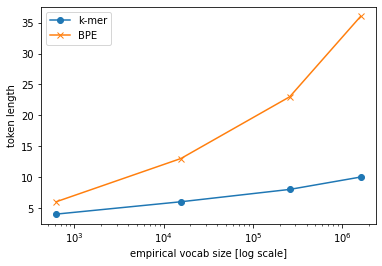

In [60]:
k = [4, 6, 8, 10]
effective_vocab = [625, 15621, 259339, 1611004]
plot(effective_vocab, k, '-o')
plot(effective_vocab, [6, 13, 23, 36], '-x')
xlabel('empirical vocab size [log scale]')
ylabel('token length')
xscale('log')
legend(['k-mer', 'BPE'])

### Another attempt

In [35]:
# in this notebook we'll only get one of the files (the Oscar one) for the sake of simplicity and performance
!wget -c https://cdn-datasets.huggingface.co/EsperBERTo/data/oscar.eo.txt

/bin/sh: wget: command not found


In [ ]:
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer

paths = [str(x) for x in Path(".").glob("**/*.txt")]
print(paths)


# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=52_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])